In [50]:
import shapely#.geometry import Point, LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

import importlib
import GeoPath
importlib.reload(GeoPath)

from joblib import Parallel, delayed
import multiprocessing

In [3]:
gdf = gpd.read_file("./MEX/MEX_ADM2_fixedInternalTopology.shp")
gdf = gdf[['shapeID', 'geometry']]
# gdf.head()

match = pd.read_csv("./gB_IPUMS_match.csv")
match = match[['shapeID', 'MUNI2015']]
ref_dict = dict(zip(match['MUNI2015'], match['shapeID']))
# match.head()

df = pd.read_csv("./mexico2010.csv")
df = df[['GEO2_MX', 'sum_income', 'total_pop', 'unrel_ppl', 'perc_urban', 'sum_num_intmig']]
df['GEO2_MX'] = df['GEO2_MX'].astype(str).str.replace("484", "").astype(int).map(ref_dict)
df = df.rename(columns = {'GEO2_MX': 'shapeID'})
# df.head()

df = df.dropna(subset = ['shapeID'])

shapeIDs = df['shapeID'].to_list()[0:5]

degrees = 2

# target_id = random.choice(df['shapeID'].to_list())
# degrees = random.randint(1, 4)

In [14]:
def load_geographs(target_id, gdf, df, degrees = degrees):
    # print(num)
    return GeoGraph(target_id, gdf, df, degrees = degrees)

In [15]:
# Parallelization
num_cores = multiprocessing.cpu_count()
nums = [i for i in range(len(shapeIDs))]
output = Parallel(n_jobs = num_cores)(delayed(load_geographs)(target_id = y, gdf = gdf, df = df, degrees = degrees) for y in shapeIDs)

In [17]:
[i.neighbors for i in output]

TypeError: 'GeoGraph' object is not iterable

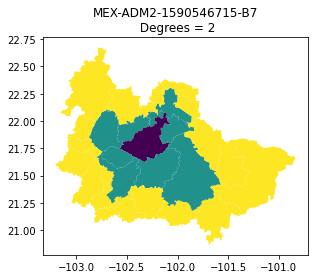

In [19]:
output[0].show()

In [26]:
def load_geopaths(sending_id, recieving_id, gdf, df = None, degrees = degrees):
    # print(num)
    return GeoPath(sending_id, recieving_id, gdf, df, degrees = degrees)

In [5]:
# # Parallelization
# num_cores = multiprocessing.cpu_count()
# nums = [i for i in range(len(shapeIDs))]
# output = Parallel(n_jobs = num_cores)(delayed(load_geopaths)(sending_id = sid, recieving_id = rid, gdf = gdf, df = df, degrees = degrees) for sid in sending_ids for rid in recieve_ids)

In [134]:
import importlib
import GeoPath
importlib.reload(GeoPath)

import GeoGraph
importlib.reload(GeoGraph)

<module 'GeoGraph' from '/home/hbaier/Desktop/graphsage/GeoGraph.py'>

In [68]:
g = GeoPath.GeoPath(sending_ids[0], recieve_ids[0], gdf, df, degrees = degrees)
print(g)

g = GeoPath.GeoPath(sending_ids[0], recieve_ids[0], gdf, df = None, degrees = degrees)
print(g)

GeoPath(x = [31,4], adj_list = [31,31], y = 769)
GeoPath(adj_list = [31,31])


<Figure size 720x720 with 0 Axes>

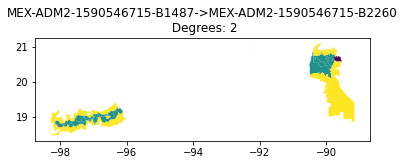

In [69]:
g.show()

In [70]:
g = GeoGraph.GeoGraph(sending_ids[0], gdf, df, degrees = degrees)
print(g)

g = GeoGraph.GeoGraph(sending_ids[0], gdf, df = None, degrees = degrees)
print(g)

GeoGraph(x = [15,4], adj_list = [15,15], y = [14.])
GeoGraph(adj_list = [15,15])


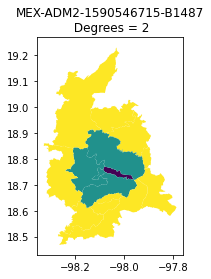

In [71]:
g.show()

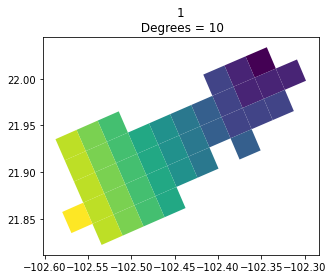

In [83]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001005.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 10)
g.show()

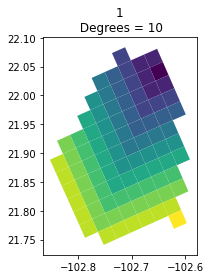

In [84]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001003.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 10)
g.show()

<AxesSubplot:>

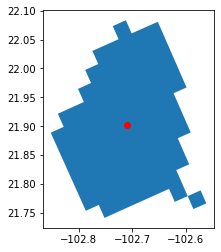

In [123]:
base = gdf2.dissolve(by = 'muni')
base.centroid.plot(ax = base.plot(), color = 'red')

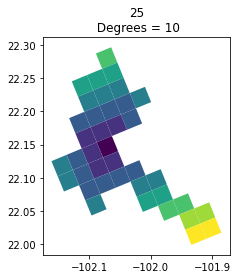

In [150]:
import importlib
import GeoPath
importlib.reload(GeoPath)

import GeoGraph
importlib.reload(GeoGraph)

gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001002.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

GeoGraph.GeoGraph('search', gdf2, df = None, degrees = 10).show()

In [151]:
[i for i in os.listdir("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/") if ".shp" in i]

['484005026.shp',
 '484012075.shp',
 '484015038.shp',
 '484019039.shp',
 '484019015.shp',
 '484020097.shp',
 '484032050.shp',
 '484020394.shp',
 '484020023.shp',
 '484014033.shp',
 '484005037.shp',
 '484020468.shp',
 '484020385.shp',
 '484026052.shp',
 '484021149.shp',
 '484027003.shp',
 '484020479.shp',
 '484021087.shp',
 '484030172.shp',
 '484026069.shp',
 '484013024.shp',
 '484021108.shp',
 '484024023.shp',
 '484031057.shp',
 '484020460.shp',
 '484020038.shp',
 '484013025.shp',
 '484031075.shp',
 '484015014.shp',
 '484030086.shp',
 '484030187.shp',
 '484011033.shp',
 '484013046.shp',
 '484030095.shp',
 '484020251.shp',
 '484020059.shp',
 '484021124.shp',
 '484030162.shp',
 '484030125.shp',
 '484012003.shp',
 '484015003.shp',
 '484007037.shp',
 '484020480.shp',
 '484021016.shp',
 '484020498.shp',
 '484019021.shp',
 '484031094.shp',
 '484025017.shp',
 '484016065.shp',
 '484016085.shp',
 '484022008.shp',
 '484019045.shp',
 '484016052.shp',
 '484014036.shp',
 '484026027.shp',
 '48401205

<AxesSubplot:>

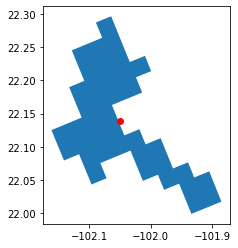

In [137]:
base = gdf2.dissolve(by = 'muni')
base.centroid.plot(ax = base.plot(), color = 'red')

In [119]:
inp, res = gdf2.sindex.query_bulk(base.centroid.geometry, predicate='intersects')
# intersected = self.gdf.loc[res]
res

array([42])

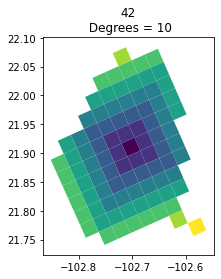

In [120]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001003.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('42', gdf2, df = None, degrees = 10)
g.show()

# for i in range(0, 20):
#     g = GeoGraph.GeoGraph(str(i), gdf2, df = None, degrees = 10)
#     g.show()

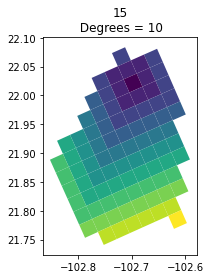

In [96]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001003.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('15', gdf2, df = None, degrees = 10)
g.show()

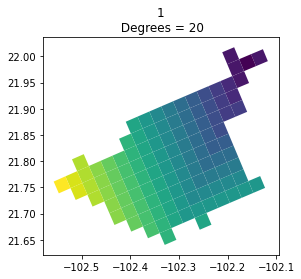

In [90]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001001.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 20)
g.show()

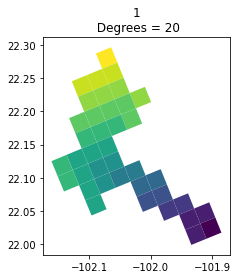

In [91]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001002.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 20)
g.show()

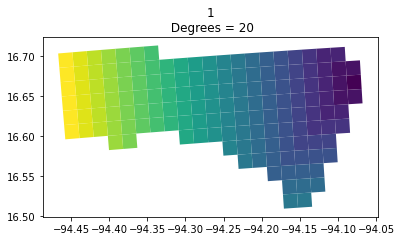

In [92]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484020265.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 20)
g.show()

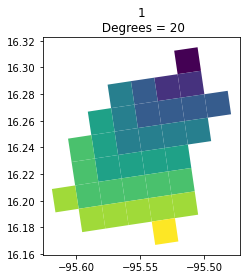

In [95]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484020282.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 20)
g.show()

In [ ]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484020282.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('1', gdf2, df = None, degrees = 20)
g.show()